In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()
fall = pd.read_csv(cwd +'/seasons/fall.csv')
spring = pd.read_csv(cwd +'/seasons/spring.csv')
summer = pd.read_csv(cwd +'/seasons/summer.csv')
winter = pd.read_csv(cwd +'/seasons/winter.csv')


In [78]:
delay = winter.append([spring,summer,fall])

In [4]:
import pickle
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [42]:
yearly

{'Total Flights': 7321736,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 638985,
  'December Flights': 649325},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1848775,
  'Winter Flights': 1695686},
 'Hour': {0: 35310,
  1: 17047,
  2: 3019,
  3: 1760,
  4: 1384,
  5: 60640,
  6: 452262,
  7: 475895,
  8: 460143,
  9: 430929,
  10: 466221,
  11: 445807,
  12: 456553,
  13: 428231,
  14: 428892,
  15: 434169,
  16: 431472,
  17: 433330,
  18: 469590,
  19: 382030,
  20: 417167,
  21: 255633,
  22: 238079,
  23: 96173},
 'Weekday': {1: 1101171,
  2: 1047272,
  3: 1061705,
  4: 1086862,
  5: 1094876,
  6: 890528,
  7: 1039322},
 'Part of Day': {'Morning Flights': 3051886,
  'Afternoon Flight

## Monthly 

In [6]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = delay['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

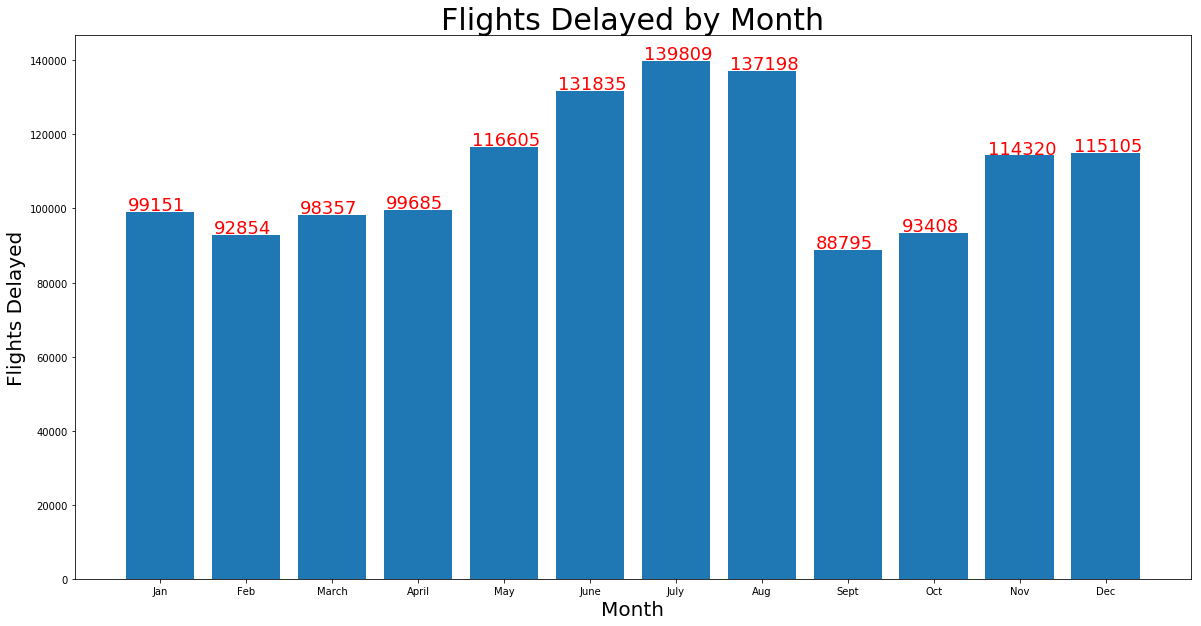

In [8]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Delayed by Month", fontsize =30)
plt.xlabel("Month", fontsize =20)
plt.xticks(range(12))
plt.ylabel("Flights Delayed", fontsize =20)
for a,b in zip(range(12), freq):
    plt.text(a -.37 , b +500, str(b), fontsize =18,color ='r')
plt.show()

In [7]:
# find pct of delays per month
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were delayed per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))

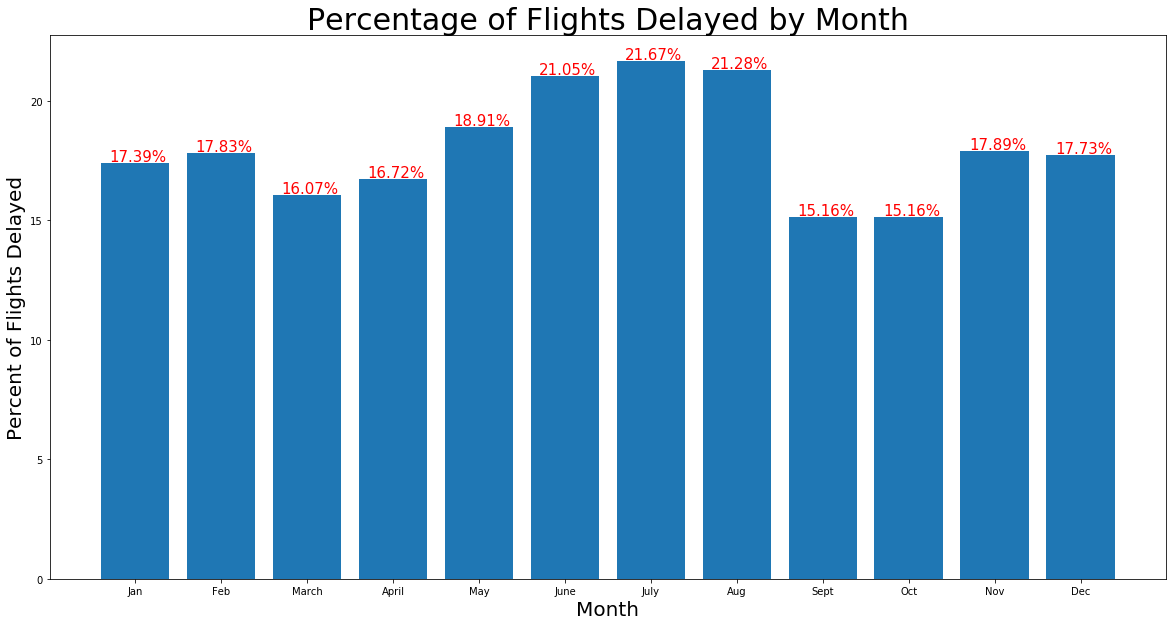

In [9]:
plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Delayed by Month", fontsize =30)
plt.xlabel("Month", fontsize =20)
plt.xticks(range(12))
plt.ylabel("Percent of Flights Delayed", fontsize =20)
for a,b in zip(range(12), m_pct):
    plt.text(a -.3, b + .08, str(b) + '%', fontsize =15, color ='r')
plt.show()

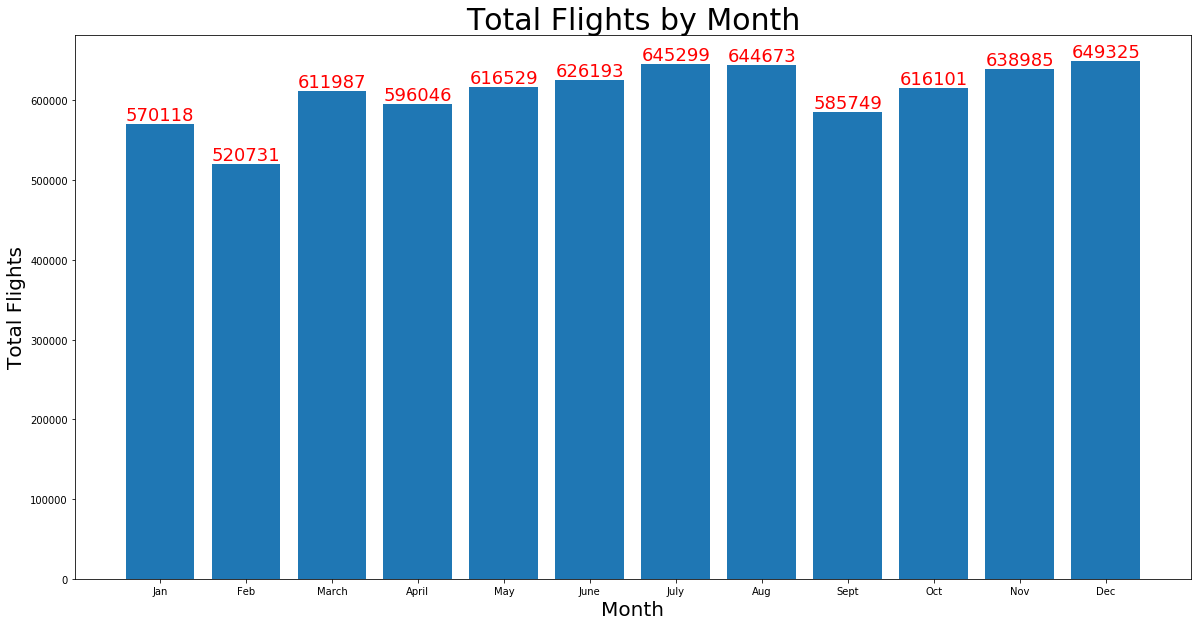

In [10]:
plt.figure(figsize=(20,10))
plt.bar(month, f)
plt.title("Total Flights by Month", fontsize =30)
plt.xlabel("Month", fontsize =20)
plt.xticks(range(12))
plt.ylabel("Total Flights", fontsize =20)
for a,b in zip(range(12), f):
    plt.text(a -.4, b +5000, str(b), fontsize =18, color ='r')
plt.show()

## Seasonal 

In [29]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

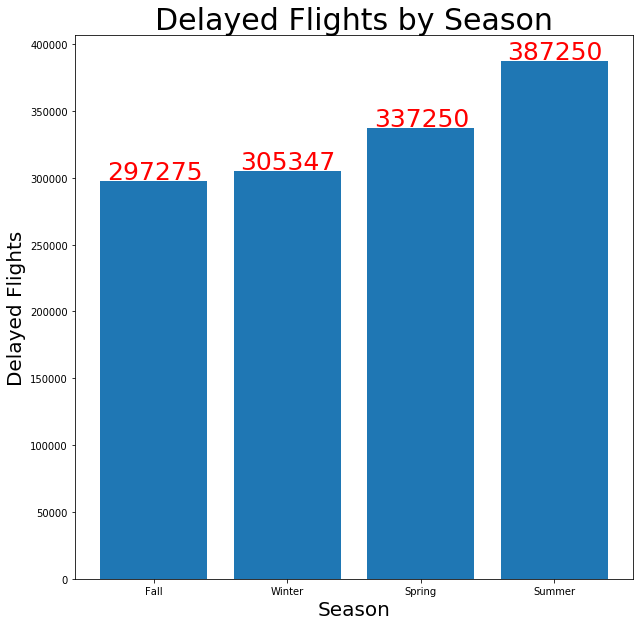

In [23]:
plt.figure(figsize=(10,10))
plt.bar(season, amt)
plt.title("Delayed Flights by Season", fontsize =30)
plt.xlabel("Season", fontsize =20)
plt.xticks(range(4))
plt.ylabel("Delayed Flights", fontsize =20)
for a,b in zip(range(4), amt):
    plt.text(a -.35 , b +1500, str(b), fontsize =25, color ='r')
plt.show()

In [12]:
# find pct of delayed per season
s = yearly['Seasons']
sea = list(s.values())
s_pct = []

#get a list of what % of flights were delayed per season
for x in range(len(s)):
    s_pct.append(round((amt[x]/sea[x]) * 100,2))

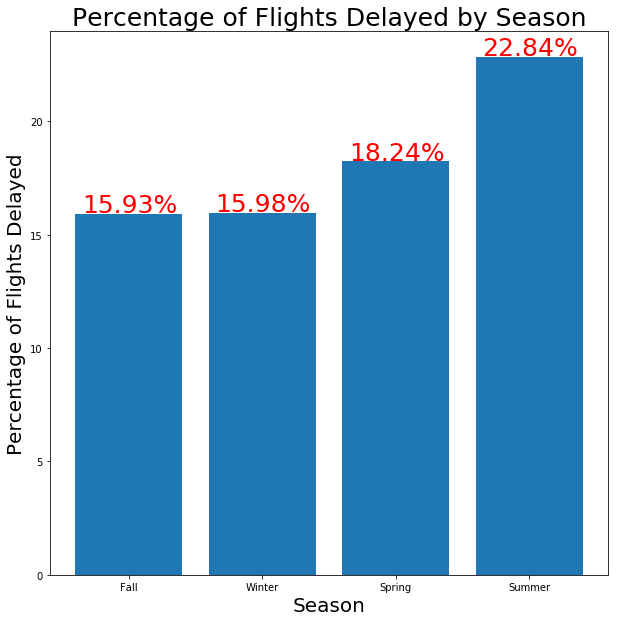

In [30]:
plt.figure(figsize=(10,10))
plt.bar(season, s_pct)
plt.title("Percentage of Flights Delayed by Season", fontsize =25)
plt.xlabel("Season", fontsize =20)
plt.xticks(range(4))
plt.ylabel("Percentage of Flights Delayed", fontsize =20)
for a,b in zip(range(4), s_pct):
    plt.text(a - .35, b +.08, str(b) + '%', fontsize =25, color ='r')
plt.show()

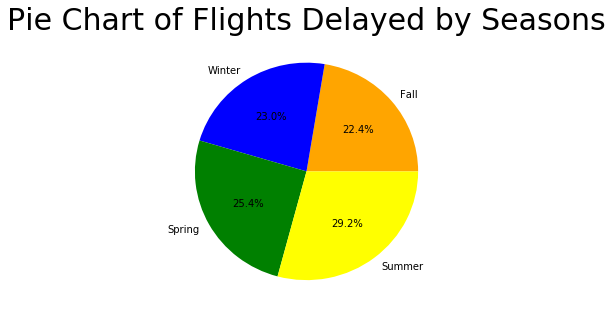

In [31]:
c = ['orange', 'blue', 'green','yellow']
plt.figure(figsize=(5,5))
plt.pie(amt, labels=season, colors= c, autopct='%1.1f%%')
plt.title("Pie Chart of Flights Delayed by Seasons", fontsize =30)
plt.show()

## Airline

#### <B><U> AIRLINE KEY
“9E” = "ENDEAVOR AIR" <br>
"AA" = "AMERICAN AIRLINES' <br>
"AS" = "ALASKA AIRLINES"<br>
"AX" = "TRANS STATES AIRLINES"<br>
"B6" = "JETBLUE AIRLINES"<br>
"C5" = "COMMUTAIR"<br>
"CP" = "COMPASS AIRLINES"<br>
"DL" = "DELTA AIRLINES"<br>
“EM” = “EMPIRE AIRLINES”<br>
“EV” = "EXPRESSJET AIRLINES"<br> 
"F9" = "FRONTIER AIRLINES"<br>
"G4" = "ALLEGIANT AIR"<br>
"G7" = "GOJET AIRLINES"<br>
"HA" = "HAWAIIAN AIRLINES"<br>
"KS" = "PENINSULA AIRWAYS”<br>
“MQ” = "ENVOY AIR"<br>
"NK" = "SPIRIT AIRLINES"<br>
“OH” = "PSA AIRLINES"<br>
“OO” = "SKYWEST AIRLINES"<br>
"PT" = "PIEDMONT AIRLINES"<br>
"QX" = "HORIZON AIR"<br>
"UA" = "UNITED AIRLINES"<br>
"VX” = ”VIRGIN AMERICA"<br>
"WN" = "SOUTHWEST AIRLINES"<br>
“YV” = ”MESA AIRLINES”<br>
“YX” = ”REPUBLIC AIRLINE”<br>
"ZW" = “AIR WISCONSIN”<br>

In [5]:
# get unique airlines and their counts
carrier = sorted(list(set(delay['OP_UNIQUE_CARRIER'])))
c_ct = delay['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in carrier]

In [50]:
len(carrier)

27

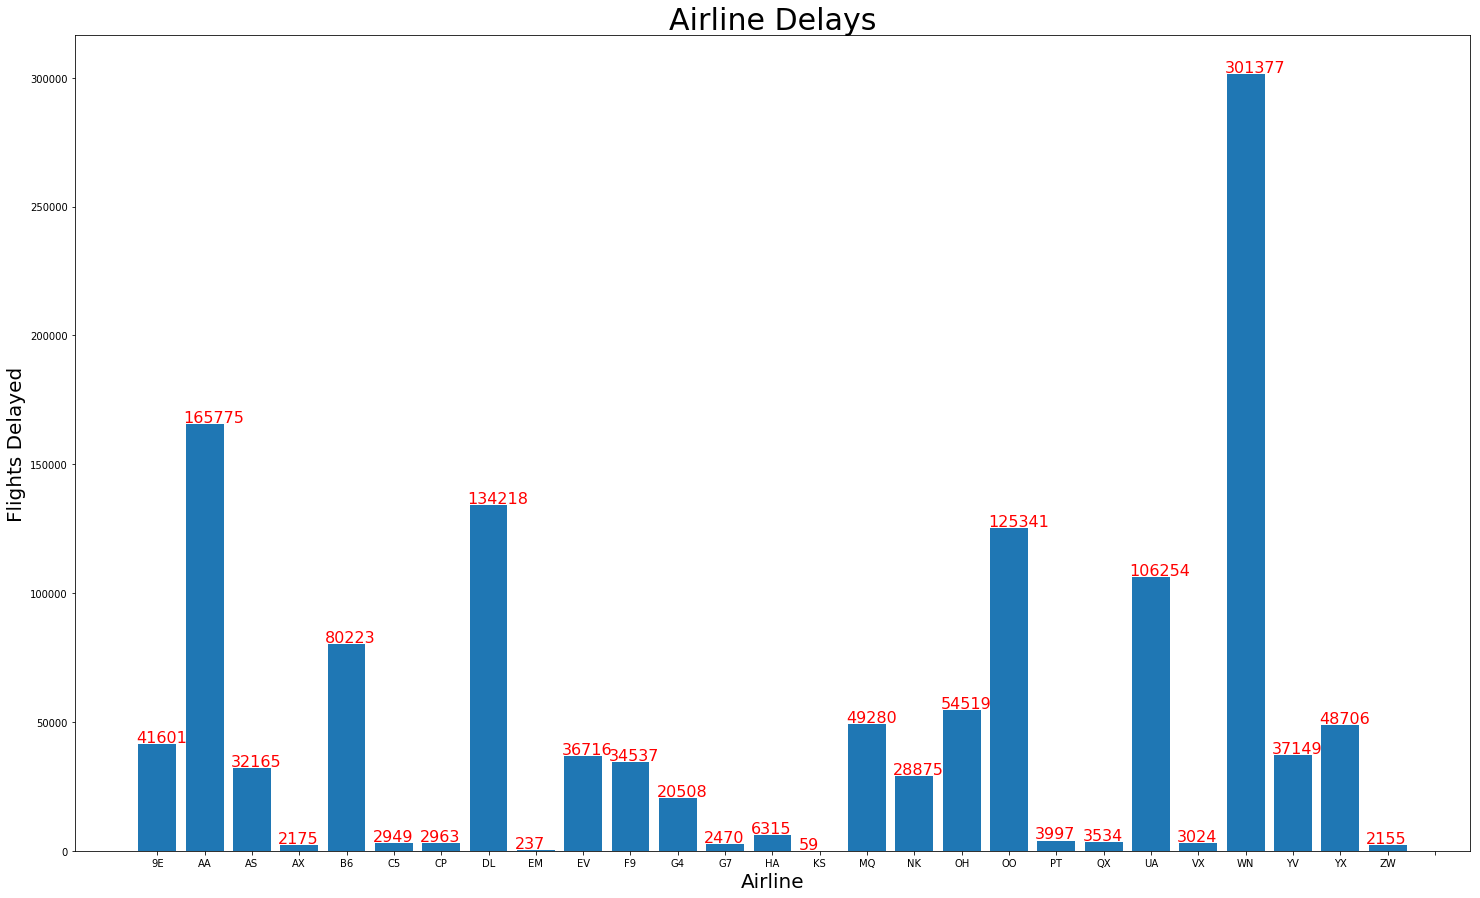

In [15]:
plt.figure(figsize=(25,15))
plt.bar(carrier, carry)
plt.title("Airline Delays", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Flights Delayed", fontsize =20)
for a,b in zip(range(28), carry):
    plt.text(a - .45, b + 700, str(b), fontsize =16, color ='r')
plt.show()

In [6]:
# find pct of delays per airline
a = yearly['Airlines']
line = list(a.values())
a_pct = []

#get a list of what % of flights were delayed per airline
for x in range(len(a)):
    a_pct.append(round((carry[x]/line[x]) * 100,2))

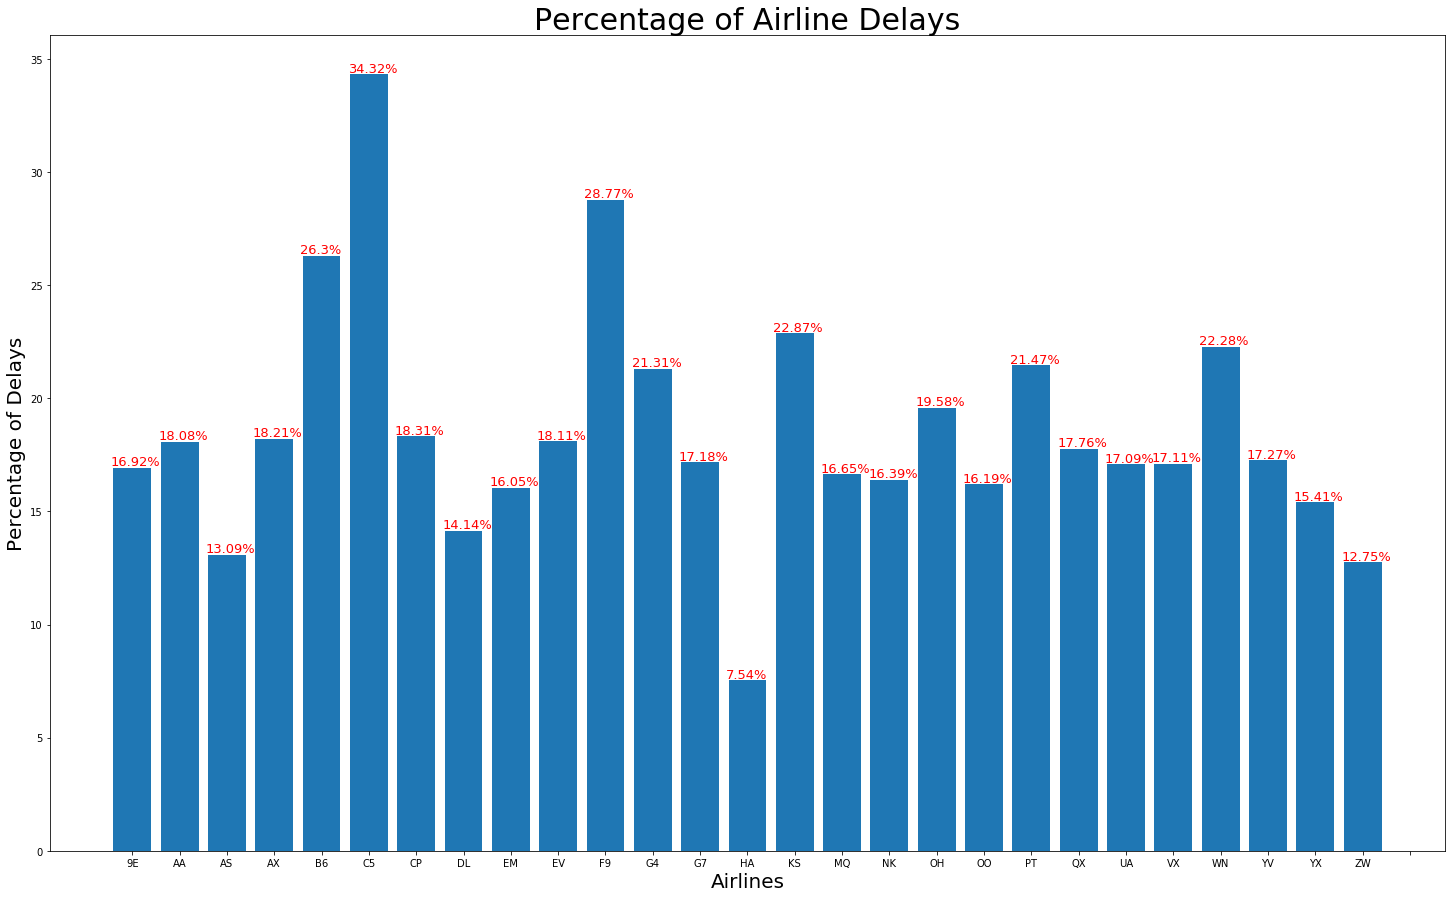

In [32]:
plt.figure(figsize=(25,15))
plt.bar(carrier, a_pct)
plt.title("Percentage of Airline Delays", fontsize =30)
plt.xlabel("Airlines", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Percentage of Delays", fontsize =20)
for a,b in zip(range(28), a_pct):
    plt.text(a -.45, b +.1, str(b) + '%', fontsize =13, color ='r')
plt.show()

## Airports

In [57]:
# get airports and their counts for airports with most delyas
p = delay['ORIGIN'].value_counts() 
airport = set(delay['ORIGIN'])
port = [x for x in airport if p[x] >=10000]
val = [p[x] for x in airport if p[x] >=10000]

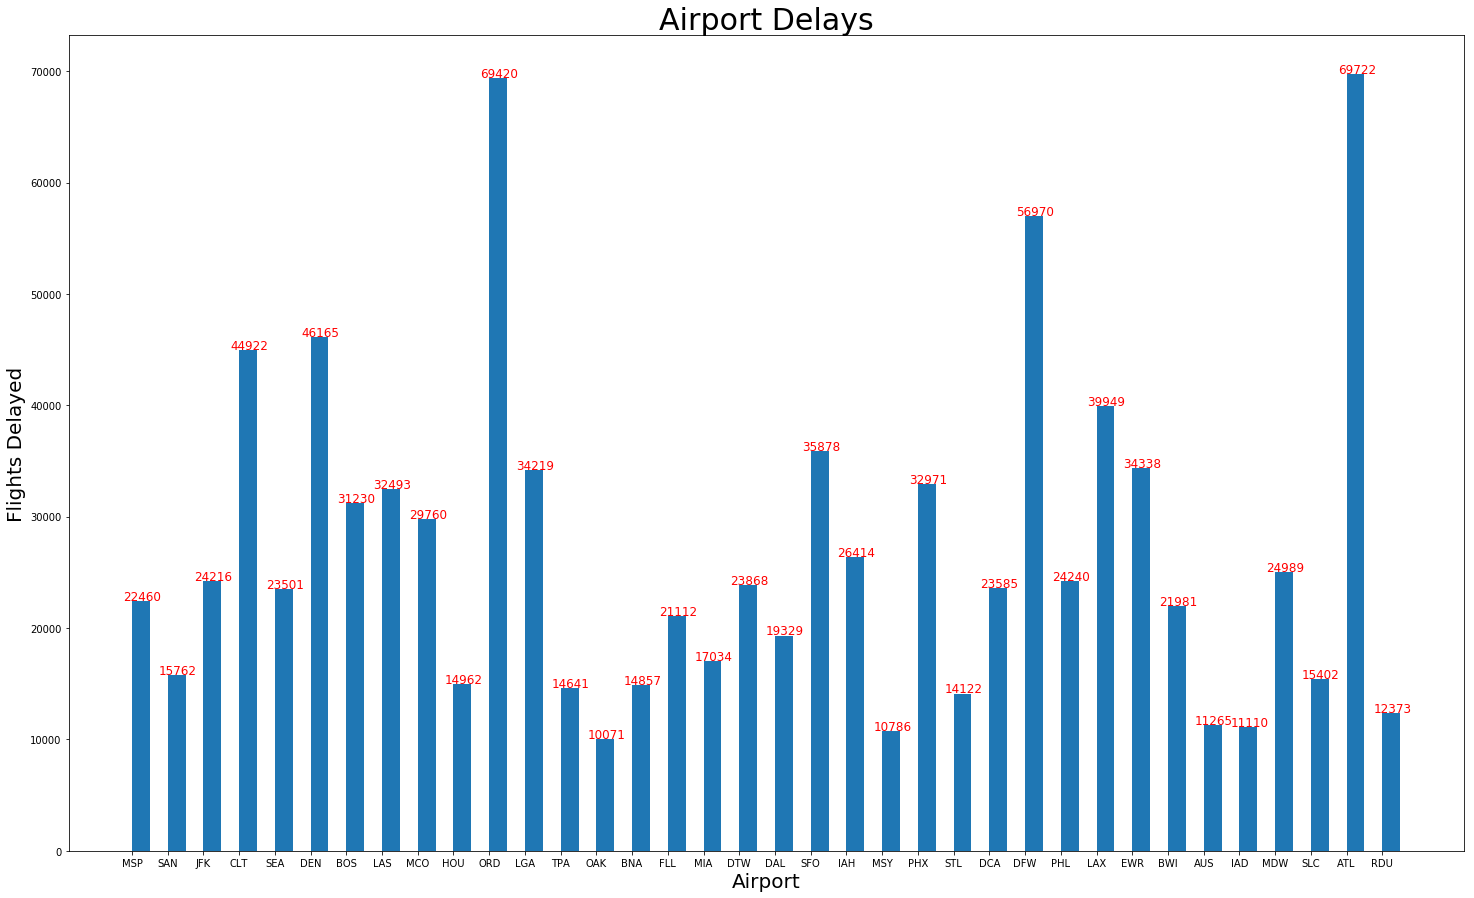

In [77]:
plt.figure(figsize=(25,15))
plt.bar(port, val, align='edge', width=0.5)
plt.title("Airport Delays", fontsize =30)
plt.xlabel('Airport', fontsize =20)
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(range(37), val):
    plt.text(a -.25, b +75, str(b), fontsize =12, color ='r')
plt.show()


In [35]:
# 370 airports
o = yearly['Airports']

In [58]:
# find pct of delays per high delay airports
p_pct =[]
b=0
for x in port:
    p_pct.append(round((val[b]/o[x])* 100,2))
    b+=1

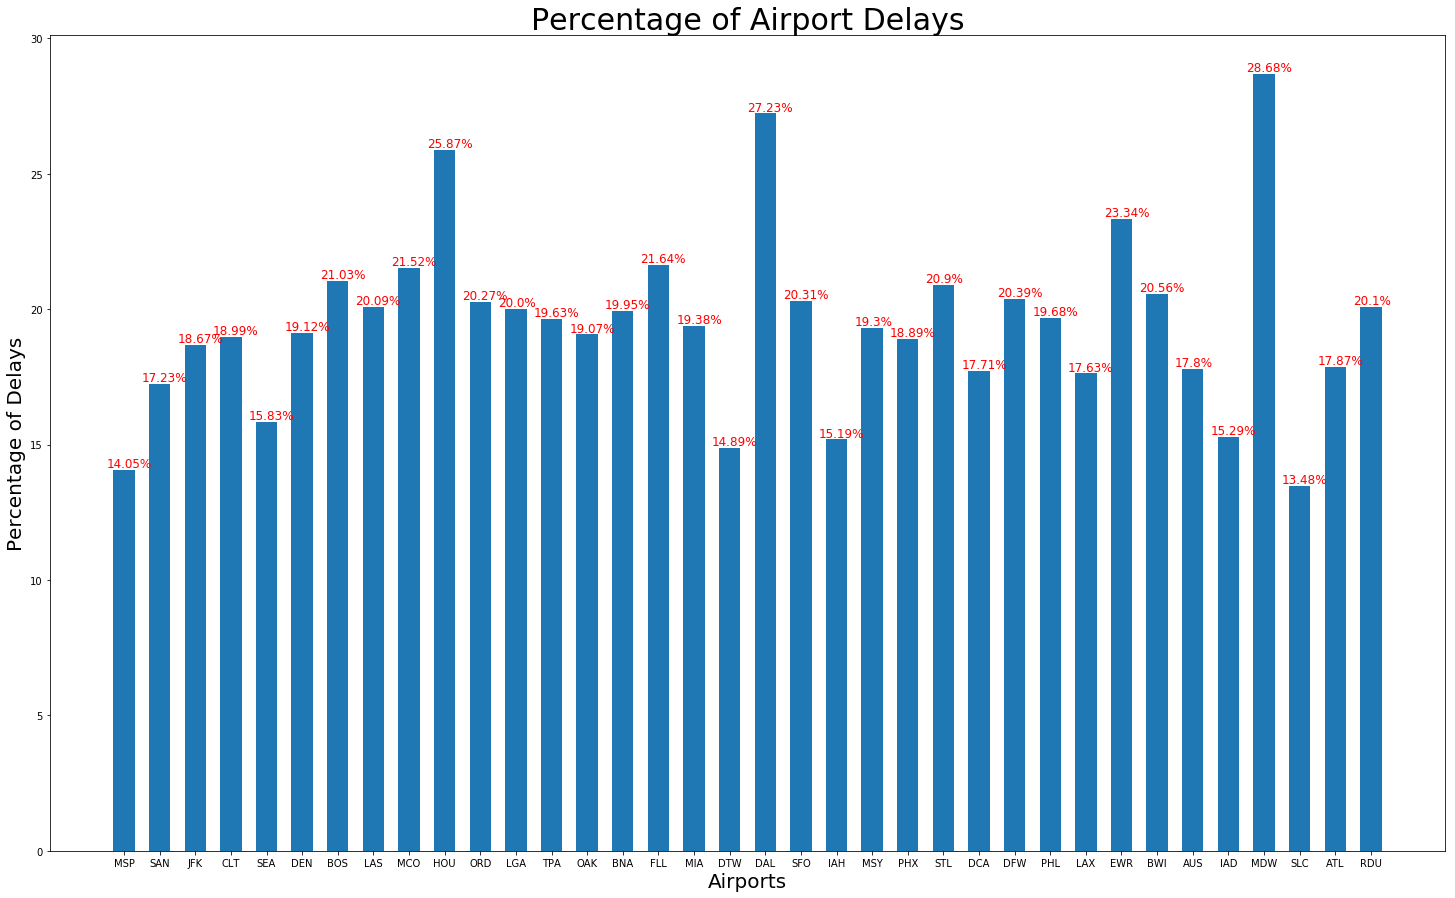

In [85]:
plt.figure(figsize=(25,15))
plt.bar(port, p_pct,width=0.6)
plt.title("Percentage of Airport Delays", fontsize =30)
plt.xlabel('Airports', fontsize =20)
plt.ylabel('Percentage of Delays', fontsize =20)
for a,b in zip(range(37), p_pct):
    plt.text(a -.5, b +.1, str(b) + '%', fontsize =12, color ='r')
plt.show()

## Day of Week

In [87]:
# get amount of delays per day of week
week = delay['DAY_OF_WEEK'].value_counts()
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekfreq = [week[x] for x in range(1,8)]

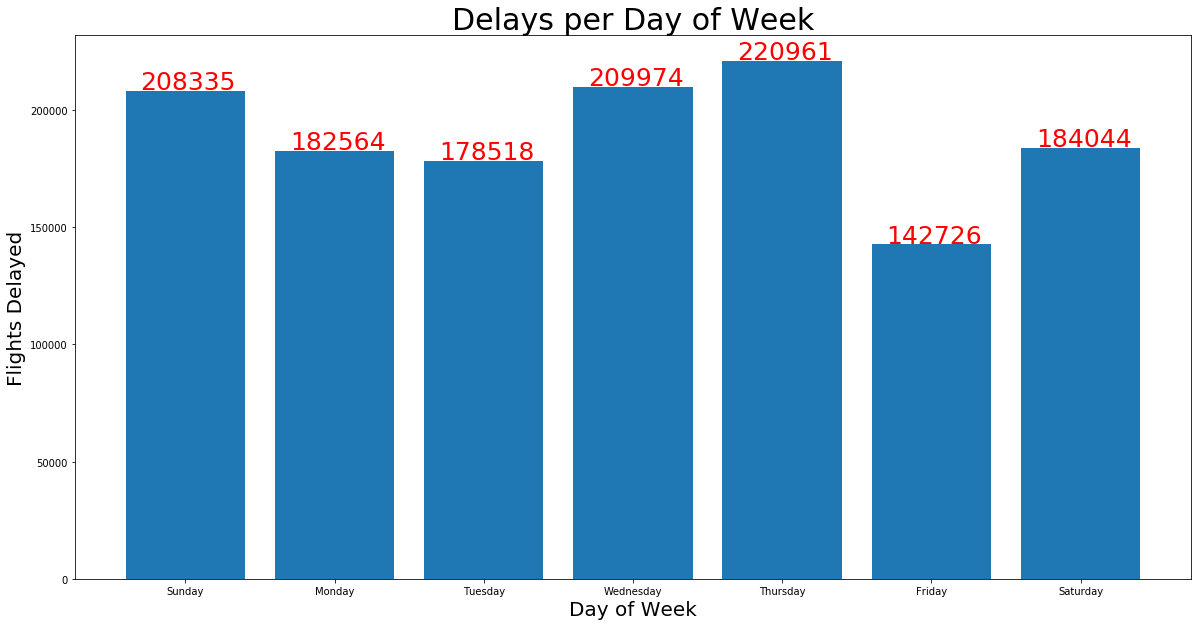

In [94]:
plt.figure(figsize=(20,10))
plt.bar(weekday, weekfreq)
plt.title("Delays per Day of Week", fontsize =30)
plt.xlabel('Day of Week', fontsize =20)
plt.xticks(range(7))
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(range(7), weekfreq):
    plt.text(a -.3, b +700, str(b), fontsize =25, color ='r')
plt.show()

In [88]:
# find pct of delays per day of week
w = yearly['Weekday']
w_pct = []

#get a list of what % of flights were delayed per day of week
for x in range(len(w)):
    w_pct.append(round((weekfreq[x]/w[x+1]) * 100,2))

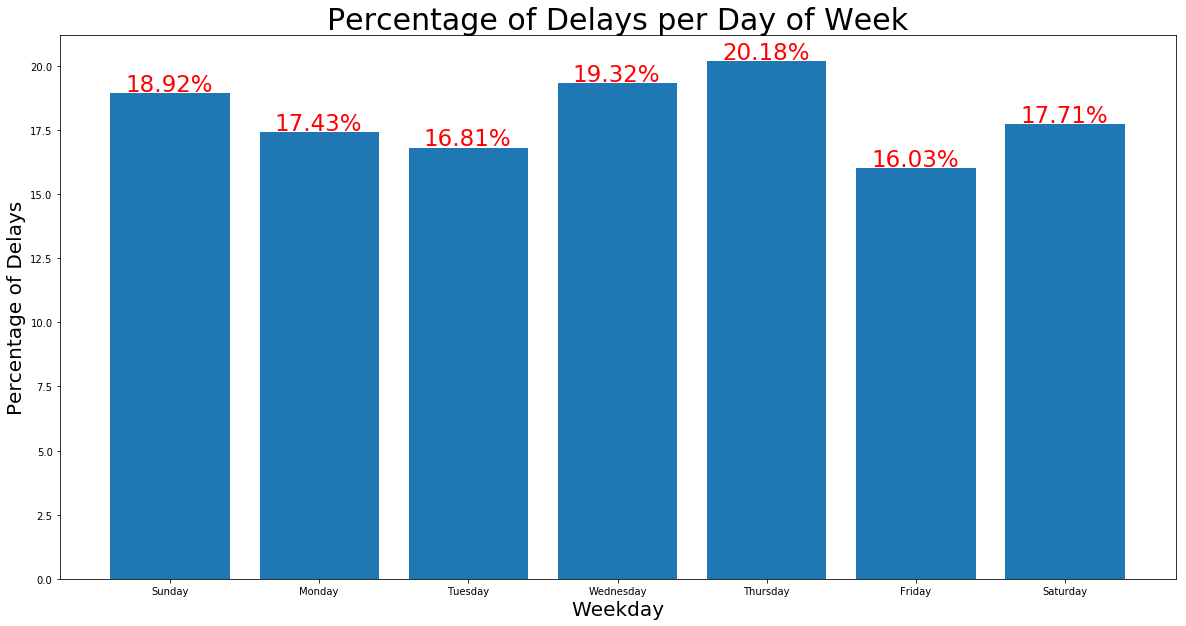

In [98]:
plt.figure(figsize=(20,10))
plt.bar(weekday, w_pct)
plt.title("Percentage of Delays per Day of Week", fontsize =30)
plt.xlabel('Weekday', fontsize =20)
plt.xticks(range(7))
plt.ylabel('Percentage of Delays', fontsize =20)
for a,b in zip(range(7), w_pct):
    plt.text(a -.3, b +.08, str(b) + '%', fontsize =23, color ='r')
plt.show()

## Time of day for departure

In [99]:
# divide day into four parts
morning = delay[(delay['CRS_DEP_TIME'] >= 500) & (delay['CRS_DEP_TIME'] <= 1200)]

afternoon = delay[(delay['CRS_DEP_TIME'] >= 1201) & (delay['CRS_DEP_TIME'] <= 1700)]

evening = delay[(delay['CRS_DEP_TIME'] >= 1701) & (delay['CRS_DEP_TIME'] <= 2100)]

night = delay[(delay['CRS_DEP_TIME'] >= 2101) | (delay['CRS_DEP_TIME'] < 500)]

In [100]:
daypart =['Morning', 'Afternoon', 'Evening', 'Night']
day =[len(morning), len(afternoon), len(evening), len(night)]

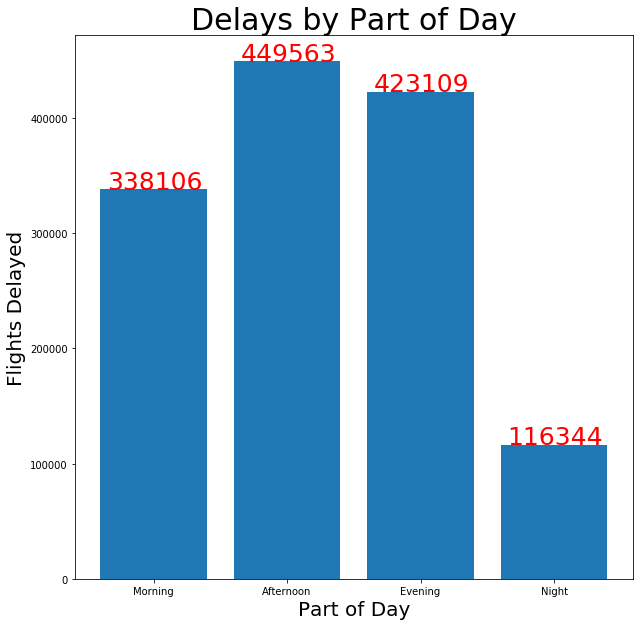

In [108]:
plt.figure(figsize=(10,10))
plt.bar(daypart, day)
plt.title("Delays by Part of Day", fontsize =30)
plt.xlabel('Part of Day', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(range(4), day):
    plt.text(a -.35, b +300, str(b), fontsize =25, color ='r')
plt.show()

In [107]:
# find pct of delays per part of day
d = yearly['Part of Day']
d_pct = []

#get a list of what % of flights were delayed per part of day
b=0
for x in d:
    d_pct.append(round((day[b]/d[x]) * 100,2))
    b+=1

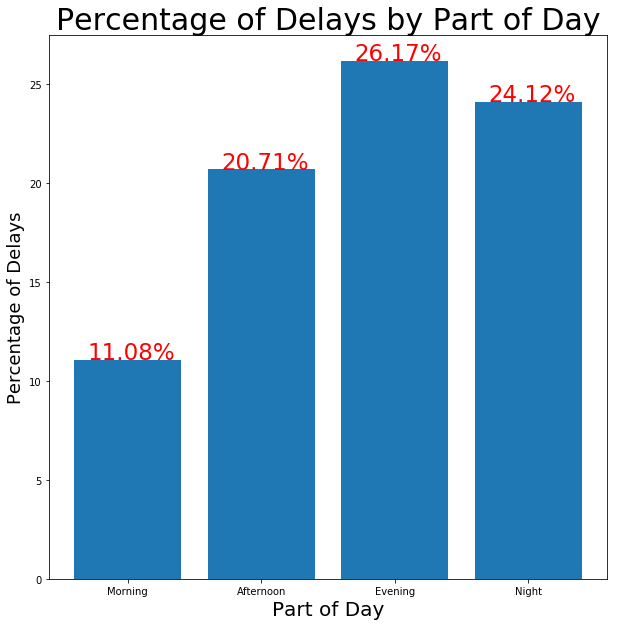

In [112]:
plt.figure(figsize=(10,10))
plt.bar(daypart, d_pct)
plt.title("Percentage of Delays by Part of Day", fontsize =30)
plt.xlabel('Part of Day', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Percentage of Delays', fontsize =18)
for a,b in zip(range(4), d_pct):
    plt.text(a -.3, b+.03, str(b) + '%', fontsize =23, color ='r')
plt.show()

## Hour of Departure 

In [123]:
# get amount of delays by hour
time = delay['HOUR'].value_counts()
hour = [x for x in range(24)]
timefreq = [time[x] for x in range(24)]

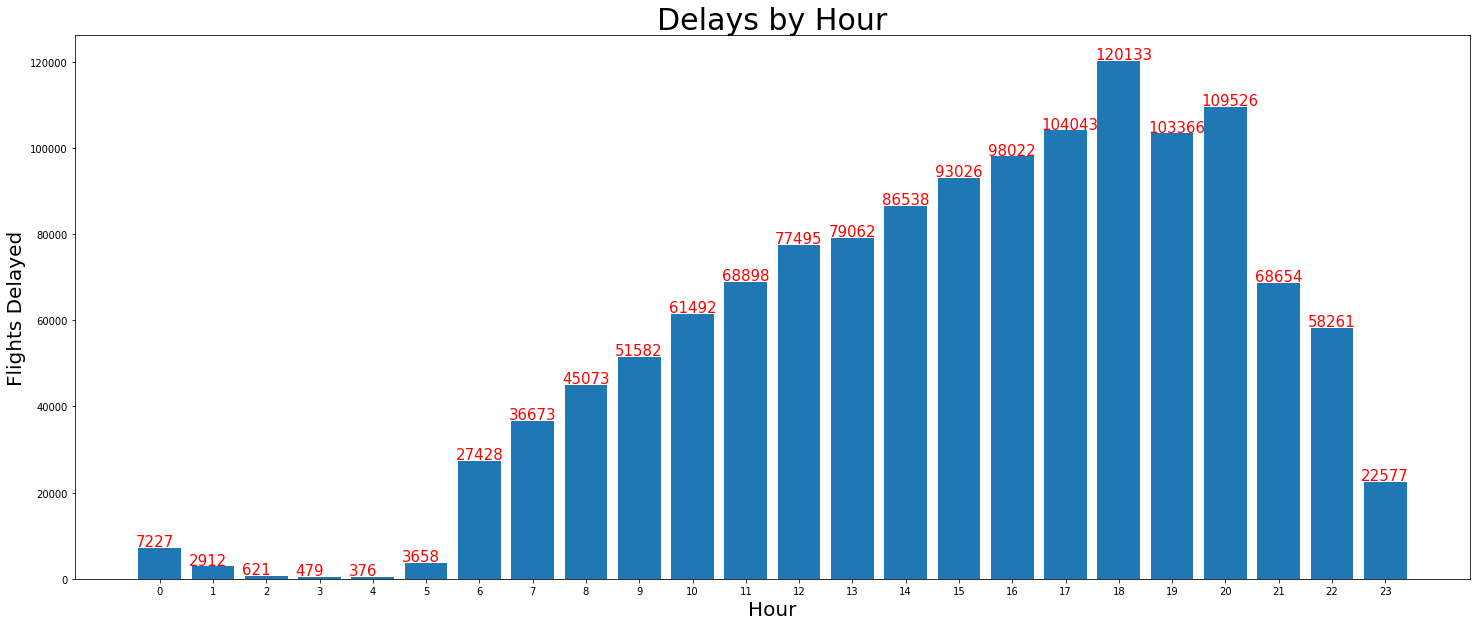

In [139]:
plt.figure(figsize=(25,10))
plt.bar(hour, timefreq)
plt.title("Delays by Hour", fontsize =30)
plt.xlabel('Hour', fontsize =20)
plt.xticks(range(0,24))
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(hour, timefreq):
    plt.text(a - .45, b +400, str(b), fontsize =15, color ='r')
plt.show()

In [140]:
# find pct of delays per hour
h = yearly['Hour']
h_pct = []

#get a list of what % of flights were delayed per hour
for x in range(len(h)):
    h_pct.append(round((timefreq[x]/h[x]) * 100,2))

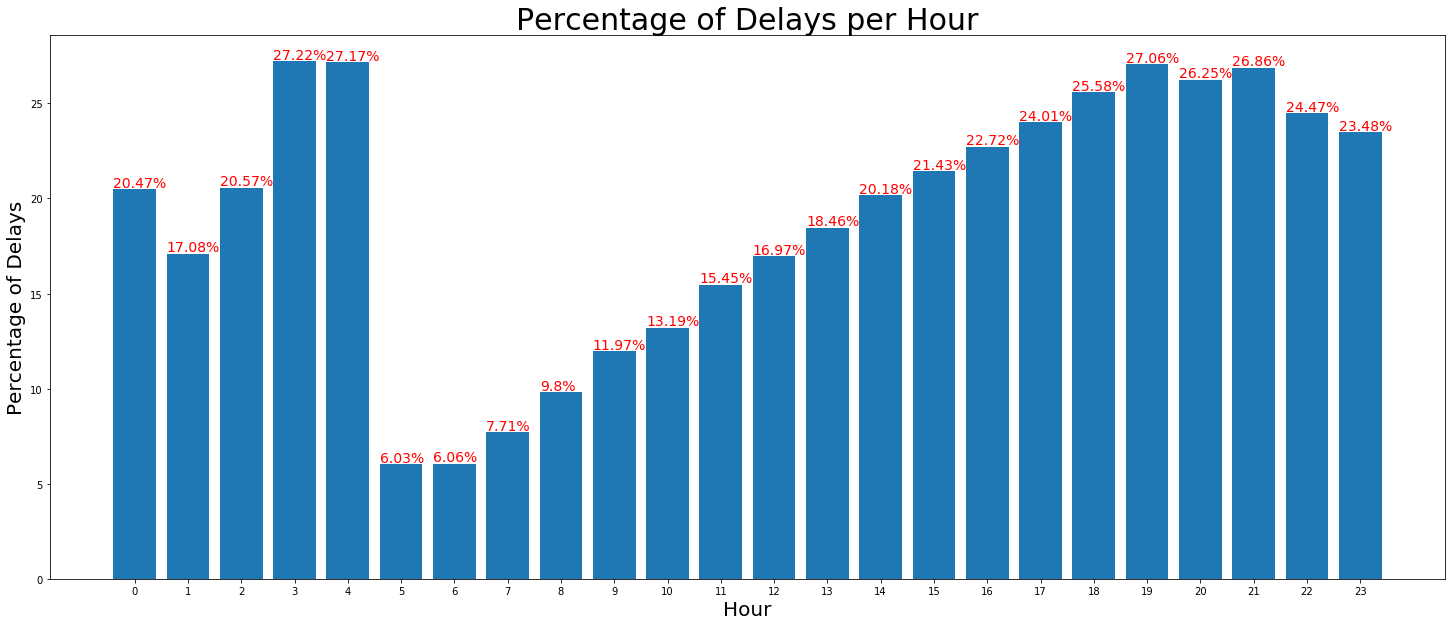

In [145]:
plt.figure(figsize=(25,10))
plt.bar(hour, h_pct)
plt.title("Percentage of Delays per Hour", fontsize =30)
plt.xlabel('Hour', fontsize =20)
plt.xticks(range(0,24))
plt.ylabel('Percentage of Delays', fontsize =20)
for a,b in zip(hour, h_pct):
    plt.text(a - .4, b +.13, str(b) + '%', fontsize =14, color ='r')
plt.show()

## Delay Cause

In [5]:
delay_type = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_count = [sum(delay['CARRIER_DELAY'].fillna(0)), sum(delay['WEATHER_DELAY'].fillna(0)), \
               sum(delay['NAS_DELAY'].fillna(0)), sum(delay['SECURITY_DELAY'].fillna(0)),\
              sum(delay['LATE_AIRCRAFT_DELAY'].fillna(0))]

In [6]:
sum(delay['CARRIER_DELAY'].fillna(0))

26144295.0

In [7]:
delay_count = [int(x) for x  in delay_count]

In [164]:
delay_count

[26144295, 4923298, 14301371, 121360, 35151990]

In [8]:
delay_count_clean = ["{:,}".format(int(x)) for x  in delay_count]

In [175]:
delay_count_clean

['26,144,295', '4,923,298', '14,301,371', '121,360', '35,151,990']

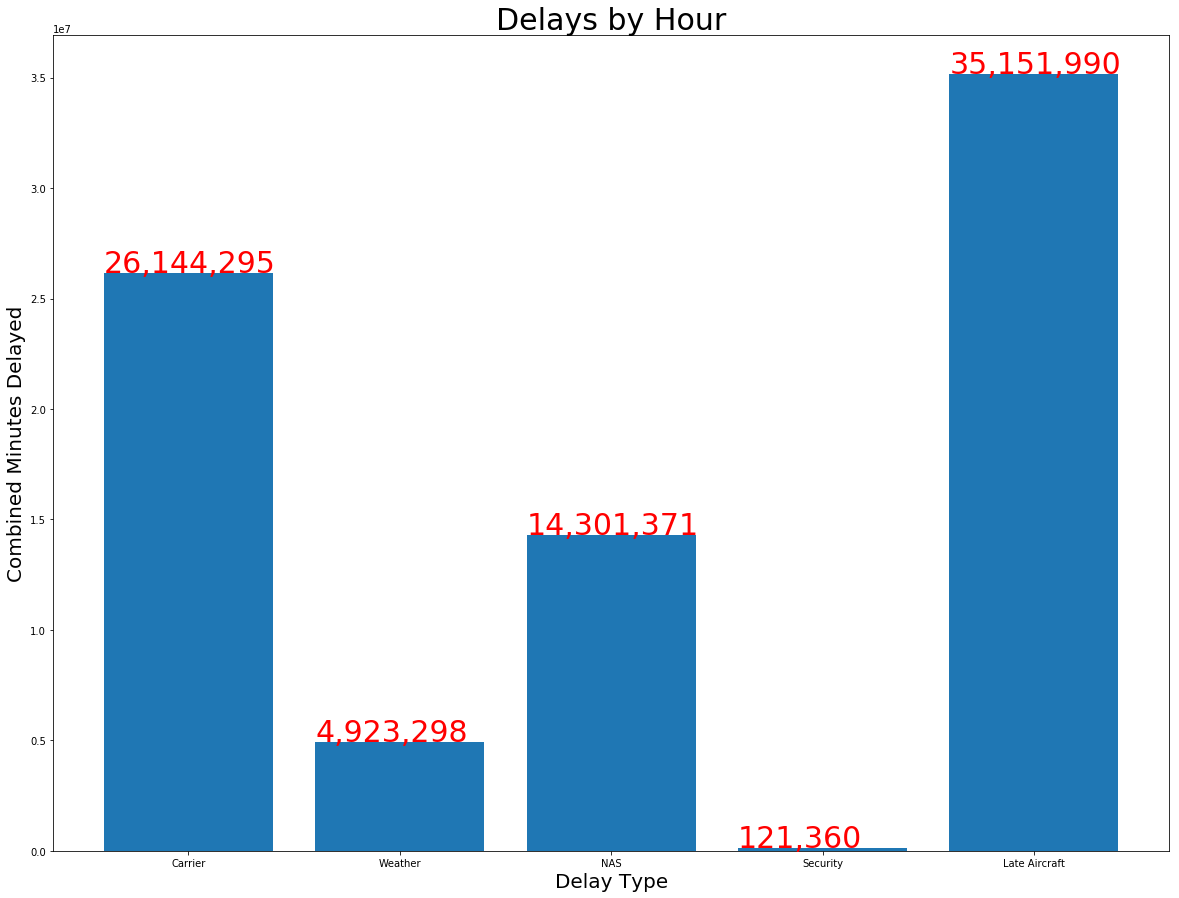

In [144]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, delay_count)
plt.title("Delays by Hour", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Combined Minutes Delayed', fontsize =20)
for a,b in zip(range(5), delay_count):
    plt.text(a - .4, b +50000, str("{:,}".format(int(b))), fontsize =30, color ='r')
plt.show()

In [79]:
# copy df to play with delay columns
type_freq = delay.copy()

In [80]:
# apply 1 if there was a delay and 0 if no delay so can count up frequency
d_type = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for d in d_type:
    type_freq[d] = type_freq[d].apply(lambda x: 1 if x > 0.0 else 0 )

In [82]:
freq_of_delay = [type_freq[d].sum() for d in d_type]

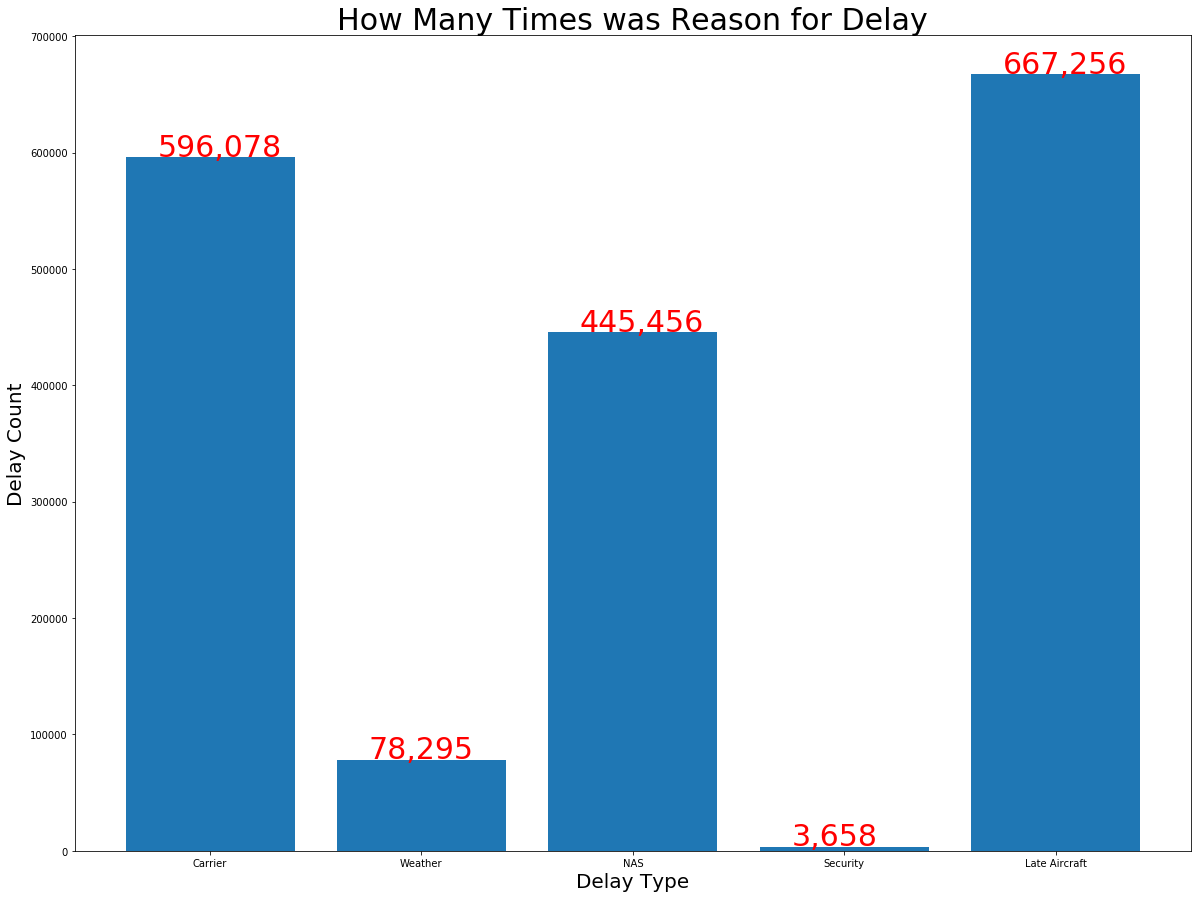

In [147]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, freq_of_delay)
plt.title("How Many Times was Reason for Delay", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Delay Count', fontsize =20)
for a,b in zip(range(5), freq_of_delay):
    plt.text(a - .25, b +1000, "{:,}".format(int(b)), fontsize =30, color ='r')
plt.show()

In [124]:
avg_delay = [round(delay_count[x]/freq_of_delay[x],0) for x in range(5)]

In [125]:
avg_delay 

[44.0, 63.0, 32.0, 33.0, 53.0]

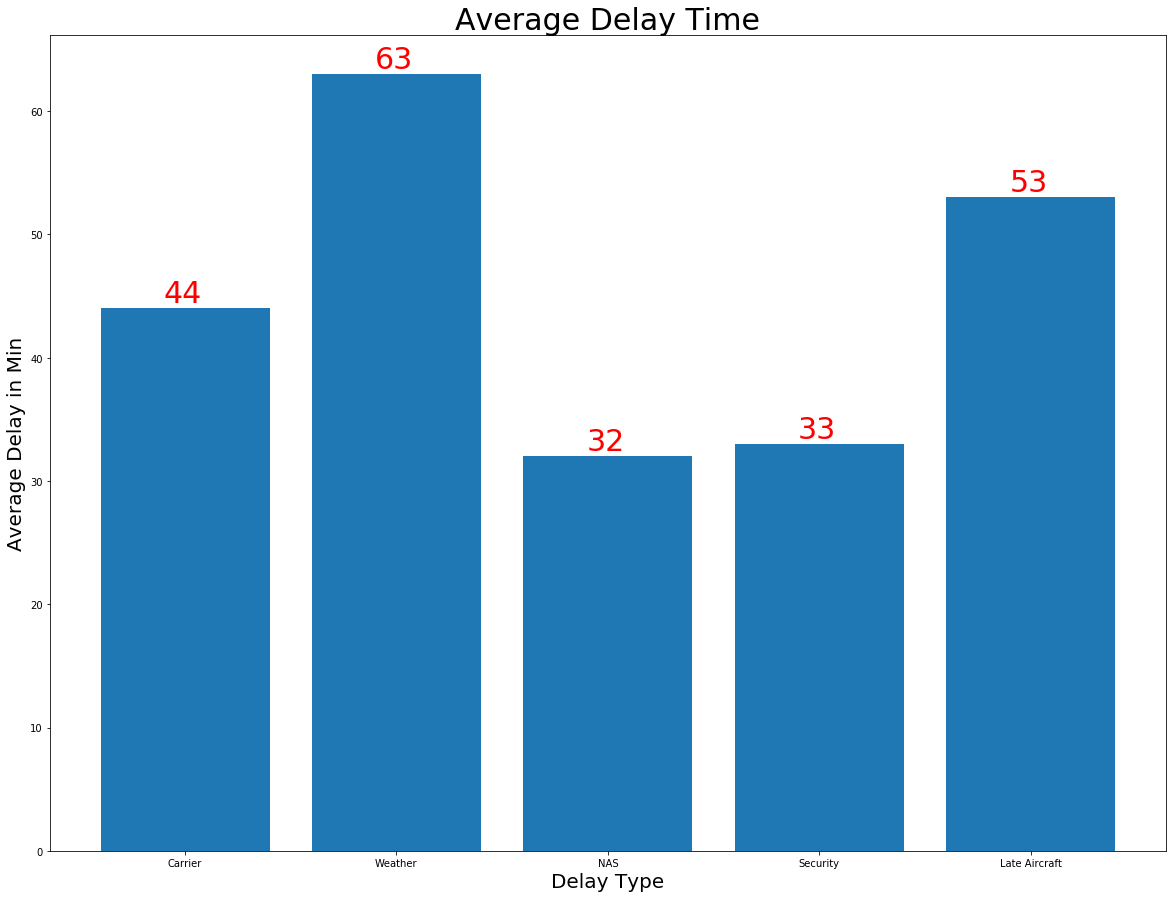

In [148]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, avg_delay )
plt.title("Average Delay Time", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Average Delay in Min', fontsize =20)
for a,b in zip(range(5), avg_delay):
    plt.text(a - .1, b + .5, str(int(b)), fontsize =30, color ='r')
plt.show()